# Task 1: Prediction using Supervised ML


## Predict the percentage of a student based on the number of study hours

### Objective: What will be the predicted score if a student studies for 9.25 hours/day?


### Data: 'Task1_data.csv'

### By Preethi Evelyn Sadanandan

### Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import linear_model
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### Loading the data and checking the summary statistics of data

In [2]:
raw_data = pd.read_csv('Task1_data.csv')
raw_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
raw_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
raw_data.isnull().sum()  #checking for missing values

Hours     0
Scores    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

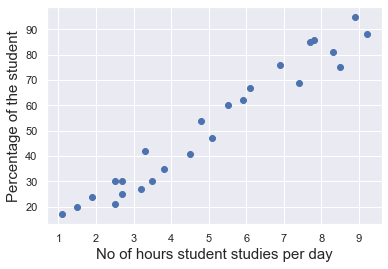

In [5]:
plt.scatter(raw_data['Hours'], raw_data['Scores'])
plt.xlabel('No of hours student studies per day', fontsize = 15)
plt.ylabel('Percentage of the student', fontsize = 15)
plt.show

In [6]:
# The scatter plot above clearly implies a linear relationship between the two variables.

#### Declaring the variables

In [7]:
y = raw_data['Scores']
x = raw_data['Hours']
x_matrix = x.values.reshape(-1,1) #to make it a 2D array

#### Splitting the dataset into 2 for training and testing

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_matrix, y, test_size = 0.2, random_state = 42, shuffle = True)

### The linear regression model

In [9]:
reg = linear_model.LinearRegression() #creating an instance of the Linear Regression class in the variable reg from scklearn
reg.fit(x_train, y_train) # fitting the model on the data

LinearRegression()

### Calculating metrics

In [10]:
#R-squared
R2 = reg.score(x_train, y_train)
print("The R-squared for the model on the training data =", R2)

The R-squared for the model on the training data = 0.9491209376364416


In [11]:
reg.coef_ #coefficient of independent variable 'Hours'

array([9.68207815])

In [12]:
reg.intercept_  #intercept term

2.826892353899737

In [13]:
#to calculate the adjusted R squared
n = raw_data.shape[0]
p = x_matrix.shape[1]
AdjR = 1 - (1-R2) *(n-1)/(n-p-1)
AdjR 

0.9469088044901999

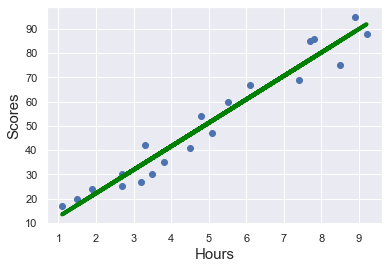

In [14]:
#Plotting the regression
plt.scatter(x_train, y_train)
y_line = reg.coef_* x_matrix + reg.intercept_
fig = plt.plot(x, y_line, lw = 4, c = 'green', label = 'regression line')
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Scores', fontsize =15)
plt.show()

In [15]:
f_regression(x_train, y_train)
p_value = f_regression(x_train, y_train)[1]
print("The p-value of the variable 'No of hours studied per day by student' = ", p_value)
#shows that the variable is significant since p-value is very low

The p-value of the variable 'No of hours studied per day by student' =  [4.33819404e-13]


### Testing the model

In [16]:
y_hat_test = reg.predict(x_test)
y_hat_test

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

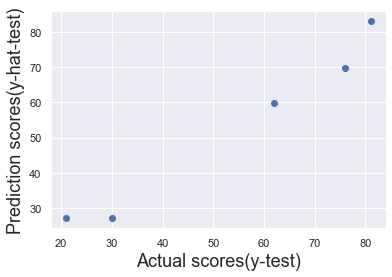

In [17]:
#Plotting the predicted scores vs. the actual scores
plt.scatter(y_test, y_hat_test)
plt.xlabel('Actual scores(y-test)', size = 18)
plt.ylabel('Prediction scores(y-hat-test)', fontsize = 18)
plt.show()

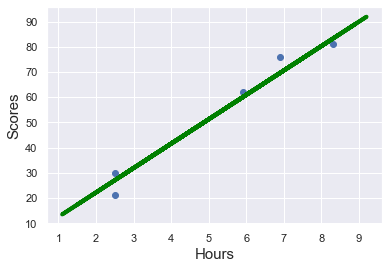

In [18]:
#Regression line on the test data
plt.scatter(x_test, y_test)
y_line = reg.coef_* x_matrix + reg.intercept_
fig = plt.plot(x, y_line, lw = 4, c = 'green', label = 'regression line')
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Scores', fontsize =15)
plt.show()

### Checking the performance of the model

In [19]:
#The R-squared on the test dataset
R2_test = reg.score(x_test, y_test) 
print("The R-squared of the model on the test dataset = ", R2_test)

The R-squared of the model on the test dataset =  0.9678055545167994


In [20]:
#The Adjusted R-squared on the test dataset
pt = 1
nt = x_test.shape[0]
AdjR = 1 - (1-R2) *(nt-1)/(nt-pt-1)
AdjR

0.9321612501819221

In [21]:
abs_error = mean_absolute_error(y_hat_test, y_test)
mean_sq_error = mean_squared_error(y_hat_test, y_test)
print("The mean absolute error of the model is =", abs_error)
print("The mean_squared error of the model is = ", mean_sq_error)

The mean absolute error of the model is = 3.9207511902099244
The mean_squared error of the model is =  18.943211722315272


### Predicting the objective: The percentage scored when a student studies 9.25 hours/day

In [22]:
pred = reg.predict([[9.25]])
print("The predicted score for a student that studies 9.25 hours per day is ", pred)

The predicted score for a student that studies 9.25 hours per day is  [92.38611528]
